In [341]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder,StandardScaler
import pickle



In [342]:
# Load the dataset
df = pd.read_csv(r"C:\Users\abims\Downloads\FAANG - FAANG.csv.csv")
print(df.isnull().sum())

Company                                      0
Ticker                                       0
Date                                         0
Open                                         0
High                                         0
Low                                          0
Close                                        0
Adj Close                                    0
Volume                                       0
Market Cap                                   0
PE Ratio                                     0
Beta                                      4982
EPS                                          0
Forward PE                                   0
Revenue                                  23055
Gross Profit                             23055
Operating Income                         23055
Net Income                                   0
Debt to Equity                               0
Return on Equity (ROE)                       0
Current Ratio                                0
Dividends Pai

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company                                23055 non-null  object 
 1   Ticker                                 23055 non-null  object 
 2   Date                                   23055 non-null  object 
 3   Open                                   23055 non-null  float64
 4   High                                   23055 non-null  float64
 5   Low                                    23055 non-null  float64
 6   Close                                  23055 non-null  float64
 7   Adj Close                              23055 non-null  float64
 8   Volume                                 23055 non-null  int64  
 9   Market Cap                             23055 non-null  float64
 10  PE Ratio                               23055 non-null  float64
 11  Be

In [344]:
df

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
0,Apple,AAPL,1/3/2005,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
1,Apple,AAPL,1/4/2005,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
2,Apple,AAPL,1/5/2005,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
3,Apple,AAPL,1/6/2005,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
4,Apple,AAPL,1/7/2005,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,Netflix,NFLX,10/11/2024,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23051,Netflix,NFLX,10/14/2024,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23052,Netflix,NFLX,10/15/2024,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23053,Netflix,NFLX,10/16/2024,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
# Fill missing numerical values with the mean
df['Open'].fillna(df['Open'].mean(), inplace=True)
df['Close'].fillna(df['Close'].mean(), inplace=True)
df['Volume'].fillna(df['Volume'].mean(), inplace=True)


C:\Users\abims\AppData\Local\Temp\ipykernel_28664\931491602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open'].fillna(df['Open'].mean(), inplace=True)
C:\Users\abims\AppData\Local\Temp\ipykernel_28664\931491602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [346]:
# Fill missing categorical values with the mode
df['Company'].fillna(df['Company'].mode()[0], inplace=True)

C:\Users\abims\AppData\Local\Temp\ipykernel_28664\4132305200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company'].fillna(df['Company'].mode()[0], inplace=True)


In [347]:
df

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
0,Apple,AAPL,1/3/2005,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
1,Apple,AAPL,1/4/2005,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
2,Apple,AAPL,1/5/2005,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
3,Apple,AAPL,1/6/2005,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
4,Apple,AAPL,1/7/2005,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,53.660430,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,Netflix,NFLX,10/11/2024,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23051,Netflix,NFLX,10/14/2024,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23052,Netflix,NFLX,10/15/2024,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23053,Netflix,NFLX,10/16/2024,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,14.262457,3.010000e+11,1.598133e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
df.dropna(how='all',axis=1,inplace=True)


In [349]:
df.columns

Index(['Company', 'Ticker', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Market Cap', 'PE Ratio', 'Beta', 'EPS',
       'Forward PE', 'Net Income', 'Debt to Equity', 'Return on Equity (ROE)',
       'Current Ratio', 'Dividends Paid', 'Dividend Yield',
       'Quarterly Revenue Growth', 'Analyst Recommendation', 'Target Price',
       'Free Cash Flow', 'Operating Margin', 'Profit Margin', 'Quick Ratio',
       'Price to Book Ratio', 'Enterprise Value', 'Total Debt', 'Beta (5Y)',
       'Annual Dividend Rate'],
      dtype='object')

In [350]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [351]:
def convert_volume(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1_000_000
        elif value.endswith('K'):
            return float(value[:-1]) * 1_000
    return value

if 'Volume' in df.columns:
    df['Volume'] = df['Volume'].apply(convert_volume).astype('int64')

In [352]:
df

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate
0,Apple,AAPL,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
1,Apple,AAPL,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
2,Apple,AAPL,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
3,Apple,AAPL,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
4,Apple,AAPL,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,240.78,86158123008,0.29556,0.26441,0.798,53.660430,3.570000e+12,1.010000e+11,1.239,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,Netflix,NFLX,2024-10-11,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
23051,Netflix,NFLX,2024-10-14,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
23052,Netflix,NFLX,2024-10-15,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN
23053,Netflix,NFLX,2024-10-16,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,NaN,NaN


In [353]:
# Convert numerical columns to float and int
df['Open'] = df['Open'].astype(float)
df['Close'] = df['Close'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = df['Volume'].astype(int)


In [354]:
# Calculate IQR for numerical columns
Q1 = df['Open'].quantile(0.25)
Q3 = df['Open'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Open'] < (Q1 - 1.5 * IQR)) | (df['Open'] > (Q3 + 1.5 * IQR)))]

In [355]:

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR)))]

In [356]:
Q1 = df['High'].quantile(0.25)
Q3 = df['High'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['High'] < (Q1 - 1.5 * IQR)) | (df['High'] > (Q3 + 1.5 * IQR)))]

In [357]:
Q1 = df['Low'].quantile(0.25)
Q3 = df['Low'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Low'] < (Q1 - 1.5 * IQR)) | (df['Low'] > (Q3 + 1.5 * IQR)))]

In [358]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Volume'] < (Q1 - 1.5 * IQR)) | (df['Volume'] > (Q3 + 1.5 * IQR)))]

In [359]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate
count,18019,18019.000000,18019.000000,18019.000000,18019.000000,18019.000000,1.801900e+04,1.801900e+04,18019.000000,14649.000000,...,18019.000000,1.801900e+04,18019.000000,18019.000000,18019.000000,18019.000000,1.801900e+04,1.801900e+04,14649.000000,9764.000000
mean,2015-06-04 06:18:28.829568768,64.054465,64.820130,63.285860,64.077754,63.673503,7.613265e+07,1.870909e+12,35.782666,1.141132,...,360.167194,4.908838e+10,0.260616,0.212732,1.346394,16.273234,1.848712e+12,7.387994e+10,1.141132,1.142114
min,2005-01-03 00:00:00,1.300000,1.315000,1.272857,1.290000,1.100834,1.493800e+06,3.250000e+11,23.492826,1.038000,...,200.200000,2.218148e+10,0.099150,0.073500,0.798000,6.708661,3.010000e+11,1.598133e+10,1.038000,0.800000
25%,2011-06-07 00:00:00,13.238154,13.404308,13.090466,13.246497,13.138815,2.531385e+07,1.470000e+12,23.492826,1.038000,...,200.200000,3.201187e+10,0.099150,0.073500,0.840000,6.708661,1.440000e+12,2.871900e+10,1.038000,0.800000
50%,2015-08-28 00:00:00,38.950001,39.223999,38.527500,38.924999,38.338501,5.498070e+07,2.000000e+12,35.789955,1.147000,...,218.900000,4.398850e+10,0.296140,0.264410,0.861000,8.437223,1.930000e+12,3.799100e+10,1.147000,1.000000
75%,2019-07-22 00:00:00,110.210251,112.138748,108.329998,110.299999,109.794746,1.054710e+08,2.020000e+12,45.496414,1.216000,...,601.580000,5.919100e+10,0.323630,0.267020,1.897000,14.262457,2.040000e+12,1.580000e+11,1.216000,1.000000
max,2024-10-18 00:00:00,232.639999,233.089996,222.869995,230.039993,230.039993,3.209707e+08,3.580000e+12,45.496414,1.239000,...,718.880000,8.615812e+10,0.381050,0.343390,2.688000,53.660430,3.570000e+12,1.580000e+11,1.239000,2.000000
std,NaN,60.752327,61.487681,60.020554,60.778979,60.680627,6.771098e+07,9.667978e+11,8.864189,0.078122,...,213.938494,2.054595e+10,0.101877,0.092896,0.685361,16.299556,9.718453e+11,5.788113e+10,0.078122,0.485589


In [360]:
# Calculate Z-scores for numerical columns
df['Open_zscore'] = stats.zscore(df['Open'])
df['Close_zscore'] = stats.zscore(df['Close'])
df['Volume_zscore'] = stats.zscore(df['Volume'])
df['High_zscore']=stats.zscore(df['High'])
df['Low_zscore']=stats.zscore(df['Low'])


In [361]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore
count,18019,18019.000000,18019.000000,18019.000000,18019.000000,18019.000000,1.801900e+04,1.801900e+04,18019.000000,14649.000000,...,18019.000000,1.801900e+04,1.801900e+04,14649.000000,9764.000000,1.801900e+04,1.801900e+04,1.801900e+04,1.801900e+04,1.801900e+04
mean,2015-06-04 06:18:28.829568768,64.054465,64.820130,63.285860,64.077754,63.673503,7.613265e+07,1.870909e+12,35.782666,1.141132,...,16.273234,1.848712e+12,7.387994e+10,1.141132,1.142114,-1.955875e-16,-5.678348e-17,7.571131e-17,5.047421e-17,-1.135670e-16
min,2005-01-03 00:00:00,1.300000,1.315000,1.272857,1.290000,1.100834,1.493800e+06,3.250000e+11,23.492826,1.038000,...,6.708661,3.010000e+11,1.598133e+10,1.038000,0.800000,-1.032984e+00,-1.033079e+00,-1.102346e+00,-1.032839e+00,-1.033225e+00
25%,2011-06-07 00:00:00,13.238154,13.404308,13.090466,13.246497,13.138815,2.531385e+07,1.470000e+12,23.492826,1.038000,...,6.708661,1.440000e+12,2.871900e+10,1.038000,0.800000,-8.364737e-01,-8.363528e-01,-7.505461e-01,-8.362203e-01,-8.363266e-01
50%,2015-08-28 00:00:00,38.950001,39.223999,38.527500,38.924999,38.338501,5.498070e+07,2.000000e+12,35.789955,1.147000,...,8.437223,1.930000e+12,3.799100e+10,1.147000,1.000000,-4.132378e-01,-4.138512e-01,-3.123945e-01,-4.162922e-01,-4.125095e-01
75%,2019-07-22 00:00:00,110.210251,112.138748,108.329998,110.299999,109.794746,1.054710e+08,2.020000e+12,45.496414,1.216000,...,14.262457,2.040000e+12,1.580000e+11,1.216000,1.000000,7.597580e-01,7.605183e-01,4.332999e-01,7.695839e-01,7.504994e-01
max,2024-10-18 00:00:00,232.639999,233.089996,222.869995,230.039993,230.039993,3.209707e+08,3.580000e+12,45.496414,1.239000,...,53.660430,3.570000e+12,1.580000e+11,1.239000,2.000000,2.775041e+00,2.730662e+00,3.616029e+00,2.736719e+00,2.658899e+00
std,NaN,60.752327,61.487681,60.020554,60.778979,60.680627,6.771098e+07,9.667978e+11,8.864189,0.078122,...,16.299556,9.718453e+11,5.788113e+10,0.078122,0.485589,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00


In [362]:
#Filter values with z-scores greater than 3 or less than -3
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]
df = df[(stats.zscore(df['Open']) < 3) & (stats.zscore(df['Open']) > -3)]
df = df[(stats.zscore(df['High']) < 3) & (stats.zscore(df['High']) > -3)]
df = df[(stats.zscore(df['Low']) < 3) & (stats.zscore(df['Low']) > -3)]
df = df[(stats.zscore(df['Volume']) < 3) & (stats.zscore(df['Volume']) > -3)]

In [363]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore
count,17688,17688.000000,17688.000000,17688.000000,17688.000000,17688.000000,1.768800e+04,1.768800e+04,17688.000000,14319.000000,...,17688.000000,1.768800e+04,1.768800e+04,14319.000000,9475.000000,17688.000000,17688.000000,17688.000000,17688.000000,17688.000000
mean,2015-07-06 20:26:12.862958080,64.958042,65.733950,64.179591,64.982280,64.591245,7.196145e+07,1.853356e+12,35.843060,1.140824,...,15.999184,1.831359e+12,7.373549e+10,1.140824,1.148982,0.014874,0.014883,-0.061605,0.014862,0.014891
min,2005-01-03 00:00:00,1.300000,1.315000,1.272857,1.290000,1.100834,1.493800e+06,3.250000e+11,23.492826,1.038000,...,6.708661,3.010000e+11,1.598133e+10,1.038000,0.800000,-1.032984,-1.033079,-1.102346,-1.032839,-1.033225
25%,2011-07-29 00:00:00,13.471292,13.612801,13.296198,13.462535,13.362620,2.489530e+07,1.470000e+12,23.492826,1.038000,...,6.708661,1.440000e+12,2.871900e+10,1.038000,0.800000,-0.832636,-0.832798,-0.756728,-0.832829,-0.832899
50%,2015-10-08 00:00:00,40.203999,40.549250,39.951750,40.283499,39.776234,5.366180e+07,2.000000e+12,35.789955,1.147000,...,8.437223,1.930000e+12,3.799100e+10,1.147000,1.000000,-0.392596,-0.391499,-0.331873,-0.394738,-0.388779
75%,2019-08-15 06:00:00,112.475000,114.257500,110.879374,112.692501,112.210537,1.017592e+08,2.020000e+12,45.496414,1.216000,...,14.262457,2.040000e+12,1.580000e+11,1.216000,1.000000,0.797037,0.799883,0.378480,0.804043,0.792976
max,2024-10-18 00:00:00,232.639999,233.089996,222.869995,230.039993,230.039993,2.792244e+08,3.580000e+12,45.496414,1.239000,...,53.660430,3.570000e+12,1.580000e+11,1.239000,2.000000,2.775041,2.730662,2.999475,2.736719,2.658899
std,NaN,60.921155,61.658676,60.187432,60.948087,60.839551,6.099670e+07,9.610658e+11,8.876619,0.077726,...,16.014151,9.660654e+11,5.809857e+10,0.077726,0.491019,1.002807,1.002810,0.900864,1.002809,1.002808


In [364]:
# One-hot encode the 'Company' column
df = pd.get_dummies(df, columns=['Company'], drop_first=True)

In [365]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
57,AAPL,2005-03-28,1.526786,1.534286,1.516786,1.518929,1.282698,275410800,3.580000e+12,35.789955,...,1.0,-1.029251,-1.029312,2.943152,-1.029273,-1.029161,True,False,False,False
125,AAPL,2005-07-01,1.315357,1.320357,1.296071,1.303571,1.100834,250000800,3.580000e+12,35.789955,...,1.0,-1.032732,-1.032856,2.567870,-1.032752,-1.032838,True,False,False,False
141,AAPL,2005-07-26,1.571786,1.575357,1.548571,1.558214,1.315873,268592800,3.580000e+12,35.789955,...,1.0,-1.028511,-1.028666,2.842456,-1.028605,-1.028631,True,False,False,False
143,AAPL,2005-07-28,1.566071,1.571429,1.546429,1.564286,1.321001,251311200,3.580000e+12,35.789955,...,1.0,-1.028605,-1.028566,2.587223,-1.028669,-1.028667,True,False,False,False
147,AAPL,2005-08-03,1.542500,1.546786,1.527500,1.543571,1.303507,258322400,3.580000e+12,35.789955,...,1.0,-1.028993,-1.028907,2.690772,-1.029070,-1.028982,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,NFLX,2022-09-13,226.500000,227.690002,217.720001,218.130005,218.130005,8000100,3.250000e+11,42.824500,...,NaN,2.673972,2.534701,-1.006254,2.648895,2.573092,False,False,False,True
22528,NFLX,2022-09-14,219.820007,228.000000,215.800003,224.119995,224.119995,8230300,3.250000e+11,42.824500,...,NaN,2.564015,2.633257,-1.002854,2.653936,2.541102,False,False,False,True
22537,NFLX,2022-09-27,228.630005,230.639999,220.720001,224.360001,224.360001,7762200,3.250000e+11,42.824500,...,NaN,2.709034,2.637206,-1.009768,2.696873,2.623077,False,False,False,True
22547,NFLX,2022-10-11,226.050003,230.440002,213.699997,214.289993,214.289993,15282400,3.250000e+11,42.824500,...,NaN,2.666565,2.471519,-0.898701,2.693620,2.506113,False,False,False,True


In [366]:
from sklearn.preprocessing import LabelEncoder


In [367]:
label_encoder = LabelEncoder()
df['Ticker'] = label_encoder.fit_transform(df['Ticker'])

In [368]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
57,0,2005-03-28,1.526786,1.534286,1.516786,1.518929,1.282698,275410800,3.580000e+12,35.789955,...,1.0,-1.029251,-1.029312,2.943152,-1.029273,-1.029161,True,False,False,False
125,0,2005-07-01,1.315357,1.320357,1.296071,1.303571,1.100834,250000800,3.580000e+12,35.789955,...,1.0,-1.032732,-1.032856,2.567870,-1.032752,-1.032838,True,False,False,False
141,0,2005-07-26,1.571786,1.575357,1.548571,1.558214,1.315873,268592800,3.580000e+12,35.789955,...,1.0,-1.028511,-1.028666,2.842456,-1.028605,-1.028631,True,False,False,False
143,0,2005-07-28,1.566071,1.571429,1.546429,1.564286,1.321001,251311200,3.580000e+12,35.789955,...,1.0,-1.028605,-1.028566,2.587223,-1.028669,-1.028667,True,False,False,False
147,0,2005-08-03,1.542500,1.546786,1.527500,1.543571,1.303507,258322400,3.580000e+12,35.789955,...,1.0,-1.028993,-1.028907,2.690772,-1.029070,-1.028982,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,4,2022-09-13,226.500000,227.690002,217.720001,218.130005,218.130005,8000100,3.250000e+11,42.824500,...,NaN,2.673972,2.534701,-1.006254,2.648895,2.573092,False,False,False,True
22528,4,2022-09-14,219.820007,228.000000,215.800003,224.119995,224.119995,8230300,3.250000e+11,42.824500,...,NaN,2.564015,2.633257,-1.002854,2.653936,2.541102,False,False,False,True
22537,4,2022-09-27,228.630005,230.639999,220.720001,224.360001,224.360001,7762200,3.250000e+11,42.824500,...,NaN,2.709034,2.637206,-1.009768,2.696873,2.623077,False,False,False,True
22547,4,2022-10-11,226.050003,230.440002,213.699997,214.289993,214.289993,15282400,3.250000e+11,42.824500,...,NaN,2.666565,2.471519,-0.898701,2.693620,2.506113,False,False,False,True


In [369]:
print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())

               Open          High           Low         Close        Volume
count  17688.000000  17688.000000  17688.000000  17688.000000  1.768800e+04
mean      64.958042     65.733950     64.179591     64.982280  7.196145e+07
std       60.921155     61.658676     60.187432     60.948087  6.099670e+07
min        1.300000      1.315000      1.272857      1.290000  1.493800e+06
25%       13.471292     13.612801     13.296198     13.462535  2.489530e+07
50%       40.203999     40.549250     39.951750     40.283499  5.366180e+07
75%      112.475000    114.257500    110.879374    112.692501  1.017592e+08
max      232.639999    233.089996    222.869995    230.039993  2.792244e+08


In [370]:
import matplotlib.pyplot as plt

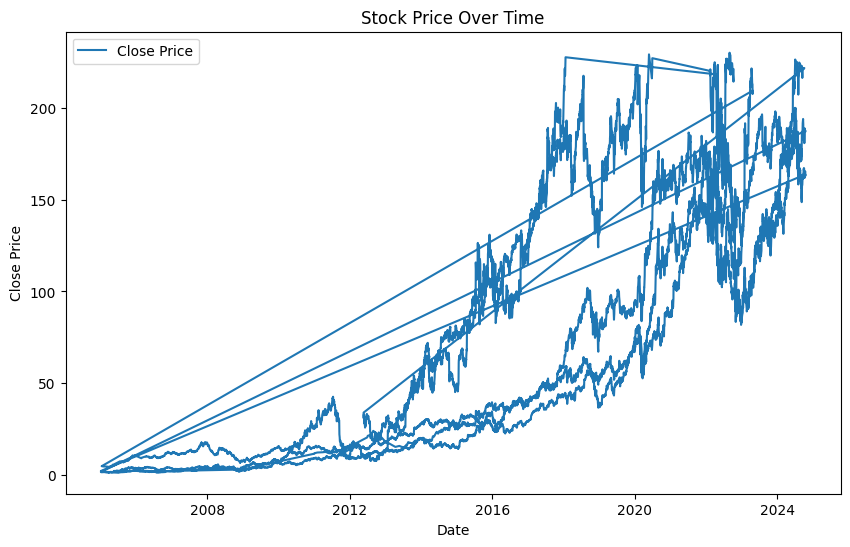

In [371]:
#Line Chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

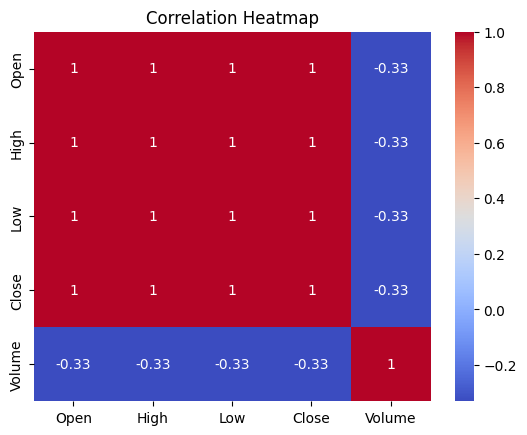

In [372]:
#Heat Map
import seaborn as sns
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

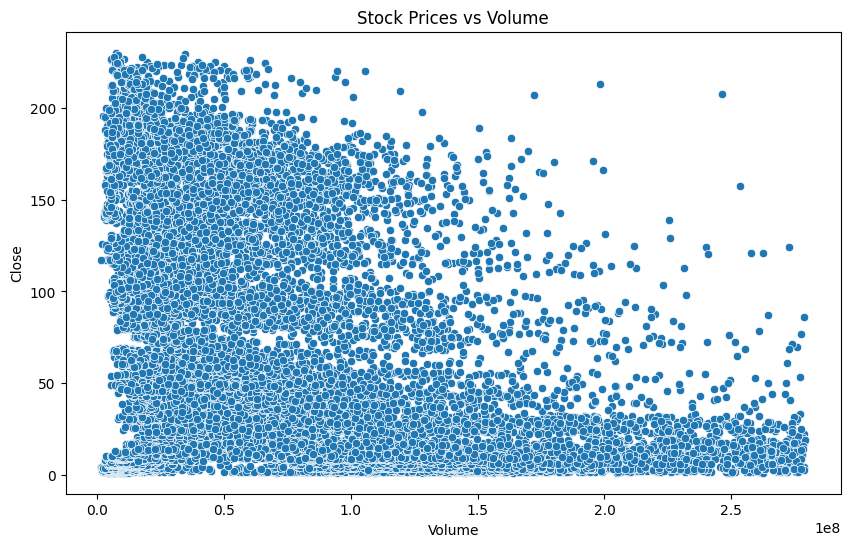

In [373]:
#Scatter  Plot
plt.figure(figsize=(10, 6))
plt.title("Stock Prices vs Volume")
sns.scatterplot(x='Volume', y='Close', data=df)
plt.show()

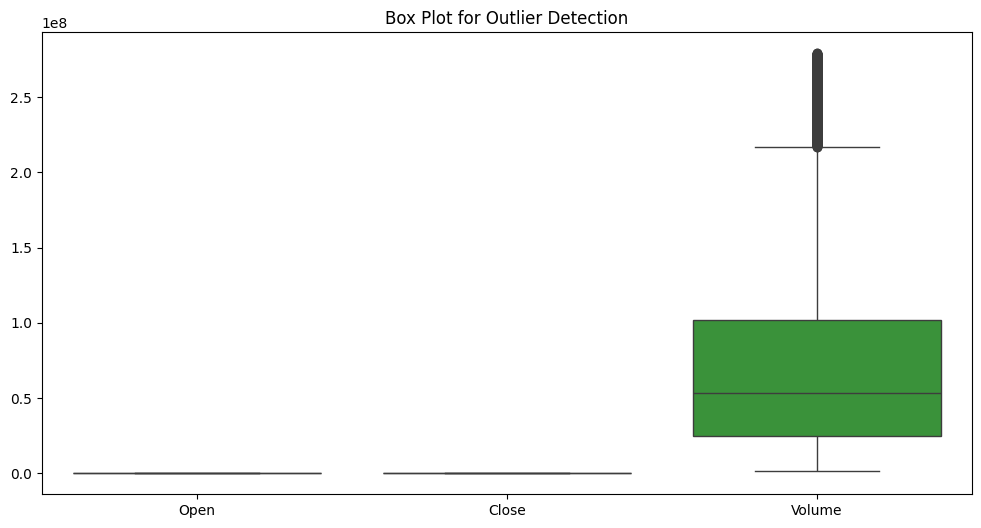

In [374]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'Close', 'Volume']])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [375]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]

In [376]:
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [377]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [378]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

In [379]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]
df = df[(stats.zscore(df['Close']) < 3) & (stats.zscore(df['Close']) > -3)]

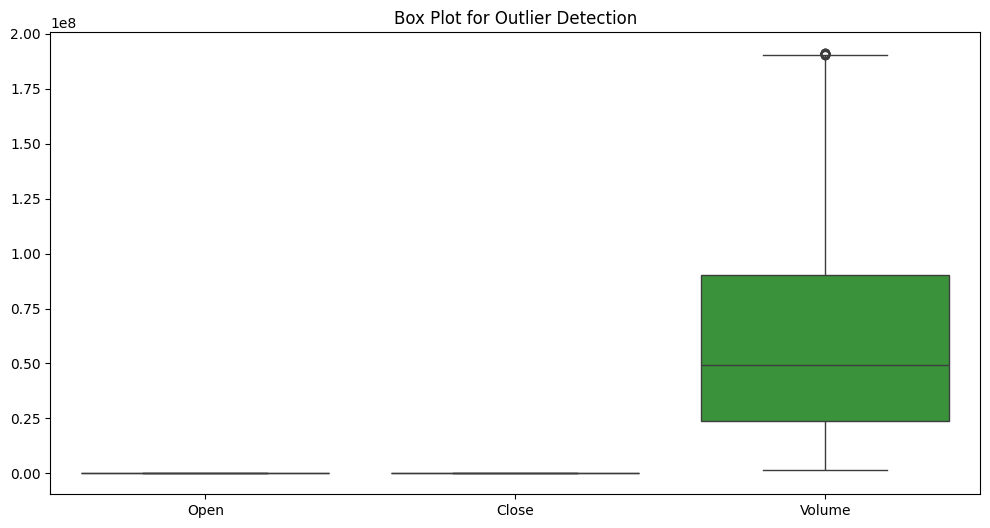

In [380]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'Close', 'Volume']])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [381]:
print(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.999860  0.999849  0.999699 -0.283701
High    0.999860  1.000000  0.999788  0.999851 -0.282808
Low     0.999849  0.999788  1.000000  0.999855 -0.284926
Close   0.999699  0.999851  0.999855  1.000000 -0.283918
Volume -0.283701 -0.282808 -0.284926 -0.283918  1.000000


In [382]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
150,0,2005-08-08,1.535714,1.544643,1.521786,1.523214,1.286316,176383200,3.580000e+12,35.789955,...,1.0,-1.029104,-1.029242,1.480607,-1.029104,-1.029077,True,False,False,False
1507,0,2010-12-28,11.639643,11.666429,11.609286,11.623929,9.816119,175924000,3.580000e+12,35.789955,...,1.0,-0.862786,-0.863050,1.473825,-0.864485,-0.861005,True,False,False,False
1508,0,2010-12-29,11.650714,11.658929,11.610714,11.617500,9.810692,163139200,3.580000e+12,35.789955,...,1.0,-0.862604,-0.863155,1.285005,-0.864607,-0.860981,True,False,False,False
1509,0,2010-12-30,11.624286,11.625357,11.537500,11.559286,9.761531,157494400,3.580000e+12,35.789955,...,1.0,-0.863039,-0.864113,1.201637,-0.865153,-0.862201,True,False,False,False
1762,0,2011-12-30,14.411071,14.510000,14.410357,14.464286,12.214729,179662000,3.580000e+12,35.789955,...,1.0,-0.817167,-0.816316,1.529031,-0.818237,-0.814335,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,4,2022-09-13,226.500000,227.690002,217.720001,218.130005,218.130005,8000100,3.250000e+11,42.824500,...,NaN,2.673972,2.534701,-1.006254,2.648895,2.573092,False,False,False,True
22528,4,2022-09-14,219.820007,228.000000,215.800003,224.119995,224.119995,8230300,3.250000e+11,42.824500,...,NaN,2.564015,2.633257,-1.002854,2.653936,2.541102,False,False,False,True
22537,4,2022-09-27,228.630005,230.639999,220.720001,224.360001,224.360001,7762200,3.250000e+11,42.824500,...,NaN,2.709034,2.637206,-1.009768,2.696873,2.623077,False,False,False,True
22547,4,2022-10-11,226.050003,230.440002,213.699997,214.289993,214.289993,15282400,3.250000e+11,42.824500,...,NaN,2.666565,2.471519,-0.898701,2.693620,2.506113,False,False,False,True


<Figure size 1000x500 with 0 Axes>

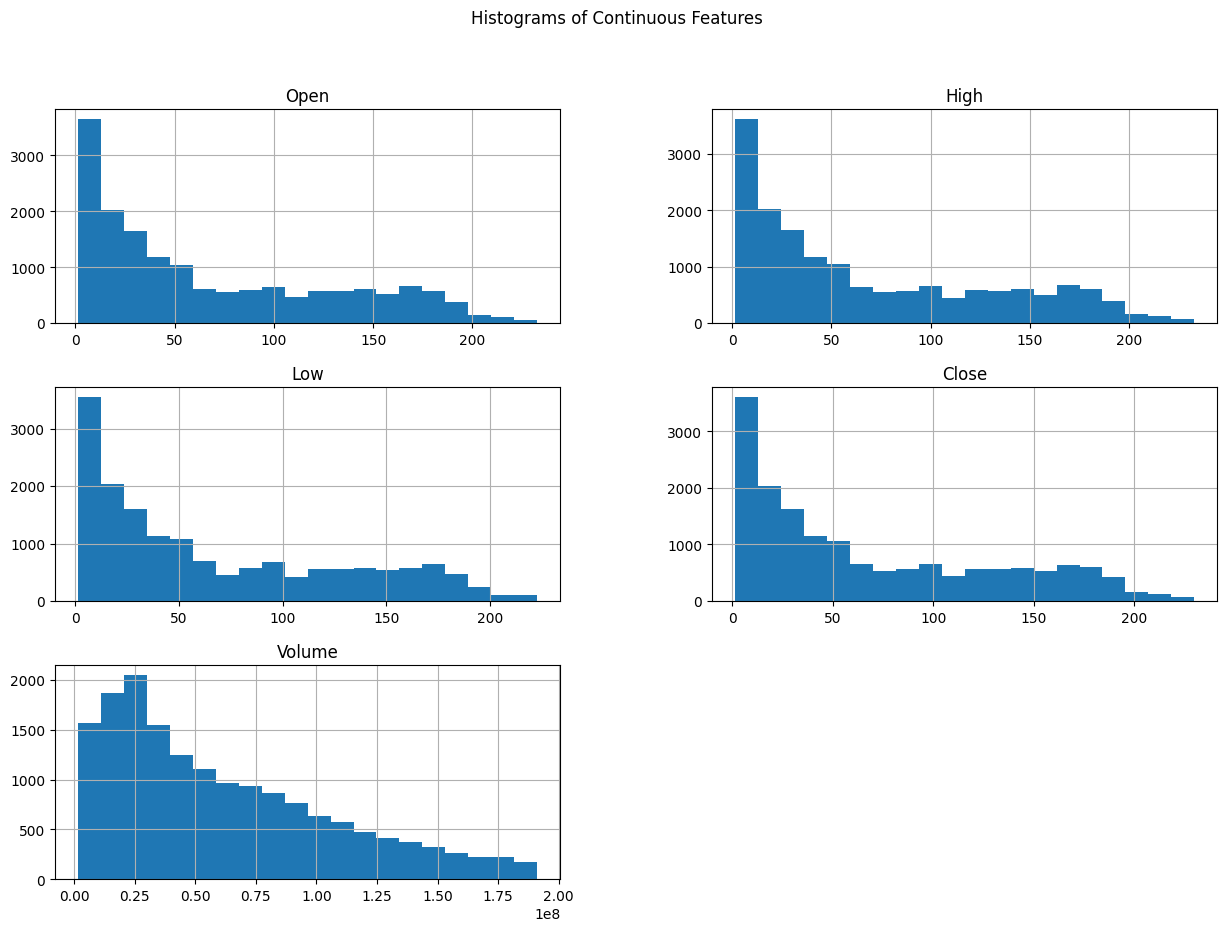


Most strongly correlated features with Close Price:


In [383]:
# Continuous Feature Analysis
plt.figure(figsize=(10, 5))
df.hist(column=['Open', 'High', 'Low', 'Close', 'Volume'], bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Features')
plt.show()

print("\nMost strongly correlated features with Close Price:")

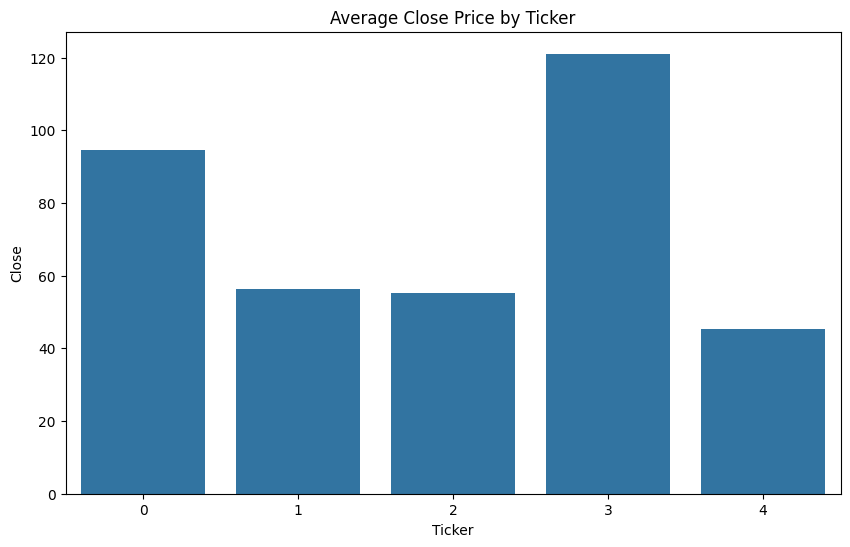

In [384]:
# Bar Plot for categorical variable 'Ticker' vs average closing price
avg_close_by_ticker = df.groupby('Ticker')['Close'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_close_by_ticker, x='Ticker', y='Close')
plt.title('Average Close Price by Ticker')
plt.show()



In [385]:
from sklearn.model_selection import train_test_split

In [386]:
# Train-test split (80% train, 20% test)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
df.sort_values('Date', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [387]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Annual Dividend Rate,Open_zscore,Close_zscore,Volume_zscore,High_zscore,Low_zscore,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
18073,4,2005-01-03,1.800000,1.800000,1.645714,1.702857,1.702857,11334400,3.250000e+11,42.824500,...,NaN,-1.024754,-1.026286,-0.957009,-1.024951,-1.027012,False,False,False,True
18074,4,2005-01-04,1.702857,1.707143,1.607143,1.665714,1.665714,17352300,3.250000e+11,42.824500,...,NaN,-1.026353,-1.026897,-0.868131,-1.026462,-1.027655,False,False,False,True
13093,1,2005-01-05,2.078500,2.138000,2.078000,2.088500,2.088500,167084000,2.000000e+12,45.496414,...,NaN,-1.020170,-1.019941,1.343266,-1.019454,-1.019810,False,False,False,False
18075,4,2005-01-05,1.677143,1.677143,1.584286,1.600000,1.600000,12732300,3.250000e+11,42.824500,...,NaN,-1.026776,-1.027979,-0.936364,-1.026949,-1.028036,False,False,False,True
13094,1,2005-01-06,2.090500,2.112500,2.045000,2.052500,2.052500,174018000,2.000000e+12,45.496414,...,NaN,-1.019972,-1.020533,1.445675,-1.019869,-1.020360,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13088,2,2024-10-16,164.529999,165.800003,163.740005,165.160004,165.160004,16406000,2.020000e+12,23.492826,...,0.8,1.653901,1.663158,-0.882107,1.642324,1.673709,False,False,True,False
18071,1,2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,2.000000e+12,45.496414,...,NaN,2.024597,2.020693,-0.777973,1.999804,2.038094,False,False,False,False
18072,1,2024-10-17,188.220001,188.940002,186.000000,187.529999,187.529999,24993600,2.000000e+12,45.496414,...,NaN,2.043856,2.031223,-0.755276,2.018670,2.044592,False,False,False,False
13089,2,2024-10-17,165.729996,166.369995,162.759995,162.929993,162.929993,21339400,2.020000e+12,23.492826,...,0.8,1.673654,1.626467,-0.809245,1.651594,1.657380,False,False,True,False


In [388]:
# Select numerical columns to scale
numerical_features = ['Open', 'High', 'Low', 'Volume']
data_to_scale = df[numerical_features]

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(data_to_scale)

# Save the Min-Max scaler using pickle
with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(minmax_scaler, file)

print("Min-Max Scaler saved successfully!")

# Standard Scaling
standard_scaler = StandardScaler()
scaled_standard = standard_scaler.fit_transform(data_to_scale)

# Save the Standard scaler using pickle
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(standard_scaler, file)


Min-Max Scaler saved successfully!


In [389]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor








In [390]:
# Model training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 0.4947572715309951
R2 Score: 0.9998419357766211


In [391]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))



Decision Tree:
MSE: 1.2644950829646533
R2 Score: 0.9995960212315087


In [392]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest:
MSE: 0.716004833783573
R2 Score: 0.9997712519764747


In [393]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
MSE: 0.9079533408854115
R2 Score: 0.9997099285893318


In [394]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [395]:
scores = cross_val_score(lr_model,X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {scores}')
print(f'Mean R2 Score: {scores.mean()}')


Cross-Validation R2 Scores: [0.99989502 0.99980371 0.99989335 0.99993658 0.99982629]
Mean R2 Score: 0.9998709896144067


In [396]:
scores = cross_val_score(dt_model,X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {scores}')
print(f'Mean R2 Score: {scores.mean()}')

Cross-Validation R2 Scores: [0.99969215 0.99952859 0.99970056 0.99979922 0.99955811]
Mean R2 Score: 0.9996557249951001


In [397]:
scores = cross_val_score(rf_model,X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {scores}')
print(f'Mean R2 Score: {scores.mean()}')

Cross-Validation R2 Scores: [0.99985841 0.99969222 0.9998414  0.99988298 0.99976694]
Mean R2 Score: 0.9998083887253788


In [398]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = xgb_model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

R2 Score: 0.9997099285893318
Mean Squared Error: 0.9079533408854115


In [399]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [400]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform cross-validation and report scores
def evaluate_model(model, X, y, kfold):
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    return np.mean(mse_scores)

In [401]:
# Initialize the model
model = LinearRegression()

# Define K-Fold Cross-Validation parameters
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Metrics to store results for each fold
mae_scores = []
rmse_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation manually
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append metrics for this fold
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    # Print the average scores across all folds
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")

Average MAE: 0.3551
Average RMSE: 0.6705
Average R²: 0.9999


In [402]:
# Initialize the model
model = DecisionTreeRegressor()

# Define K-Fold Cross-Validation parameters
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Metrics to store results for each fold
mae_scores = []
rmse_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation manually
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append metrics for this fold
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    # Print the average scores across all folds
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")

Average MAE: 0.5187
Average RMSE: 1.0132
Average R²: 0.9997


In [403]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100)

# Define K-Fold Cross-Validation parameters
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Metrics to store results for each fold
mae_scores = []
rmse_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation manually
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append metrics for this fold
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    # Print the average scores across all folds
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")

Average MAE: 0.4134
Average RMSE: 0.7833
Average R²: 0.9998


In [404]:
# Initialize the model
model = XGBRegressor()

# Define K-Fold Cross-Validation parameters
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Metrics to store results for each fold
mae_scores = []
rmse_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation manually
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Append metrics for this fold
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    # Print the average scores across all folds
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")

Average MAE: 0.4977
Average RMSE: 0.8887
Average R²: 0.9998


In [405]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [406]:
 #Define hyperparameters for tuning

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)
#

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [408]:
param_grid_lr = {}  # No hyperparameters for Linear Regression tuning
param_grid_dt = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV for each
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5)

# Fit models
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)

# Best parameters and models
print("Best Linear Regression:", grid_search_lr.best_estimator_)
print("Best Decision Tree:", grid_search_dt.best_estimator_)

Best Linear Regression: LinearRegression()
Best Decision Tree: DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2,
                      min_samples_split=5, random_state=42)


In [409]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

# Initialize the model
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                                scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Print best parameters and best estimator
print("Best XGBRegressor Parameters:", grid_search_xgb.best_params_)
print("Best XGBRegressor Model:", grid_search_xgb.best_estimator_)

Best XGBRegressor Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best XGBRegressor Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [410]:
import mlflow
import mlflow.sklearn
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [411]:



# Find the best run based on a metric (e.g., lowest RMSE)
best_model = None
best_r2 = float('-inf')
best_run_id = None
experiment_name = "FAANG_Stock_Prediction"
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    mlflow.create_experiment(experiment_name)

mlflow.set_experiment(experiment_name)


<Experiment: artifact_location='file:///c:/Users/abims/OneDrive/Documents/FAANG/stock_price_prediction/mlruns/127747216918684237', creation_time=1739435416631, experiment_id='127747216918684237', last_update_time=1739435416631, lifecycle_stage='active', name='FAANG_Stock_Prediction', tags={}>

In [412]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=42),
    'XGBRegressor':XGBRegressor()


}



mlflow.set_experiment("FAANG_Stock_Prediction")

for model_name, model in models.items():
    with mlflow.start_run() as run:
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)
        
        # Save model
        mlflow.sklearn.log_model(model, "best_model")
        
        print(f"{model_name} -> MAE: {mae}, RMSE: {rmse}, R2: {r2}")
        
        # Track the best model
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_run_id = run.info.run_id

# Register and save the best model
if best_model and best_run_id:
    with mlflow.start_run():
        model_uri = f"runs:/{best_run_id}/best_model"
        mlflow.sklearn.log_model(best_model, "best_model")
        mlflow.register_model(model_uri, "FAANG_Best_Model")
        print("Best model registered and saved in MLflow.")
        
        print(model_uri)        
    

2025/02/13 17:52:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression -> MAE: 0.33473578418159805, RMSE: 0.6341550682313359, R2: 0.9998899428858548


2025/02/13 17:52:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest -> MAE: 0.40561666755869036, RMSE: 0.7781805040629289, R2: 0.9998342750572761


2025/02/13 17:52:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeRegressor -> MAE: 0.5053316314217196, RMSE: 0.9766172336529492, R2: 0.9997389786973438


2025/02/13 17:52:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor -> MAE: 0.4796315670325375, RMSE: 0.8582524758411381, R2: 0.9997984154167231


2025/02/13 17:52:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best model registered and saved in MLflow.
runs:/e5d9a866050d43a380841e1d12b5d9e2/best_model


Registered model 'FAANG_Best_Model' already exists. Creating a new version of this model...
Created version '4' of model 'FAANG_Best_Model'.


In [414]:
# During training
import joblib

# Save the column names
joblib.dump(X_train.columns, 'feature_columns.pkl')

# Save the model
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [415]:
df.to_csv("Final_Dataframe.csv")

PermissionError: [Errno 13] Permission denied: 'Final_Dataframe.csv'